In [83]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pickle 

In [84]:
file = open('model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

### With Log 

In [85]:
x_train = data['x_train_log']
x_test = data['x_test_log']
y_train = data['y_train_log']
y_test = data['y_test_log']

In [86]:
knnR = KNeighborsRegressor()
knnR.fit(x_train, y_train)

KNeighborsRegressor()

In [87]:
y_pred = knnR.predict(x_test)

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.040461852251634
MSE: 1.6939445851307426
RMSE: 1.3015162638748479


In [89]:
parameters = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [i for i in range(3, 30)],
    'n_neighbors': [i for i in range(3, 20)]
}

In [90]:
knnR_random = RandomizedSearchCV(
    estimator = knnR, 
    param_distributions = parameters,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [91]:
knnR_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-1.670 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-1.575 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-1.634 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-1.614 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-1.630 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=17;, score=-1.576 total time=   0.4s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=17;, score=-1.529 total time=   0.4s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=17;, score=-1.562 total time=   0.4s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=17;, score=-1.548 total time=   0.4s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=17;, score=-1.548 total time=   0.4s
[CV 1/5] 

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29],
                                        'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 13, 14, 15, 16,
                                                        17, 18, 19]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [92]:
knnR_random.best_params_

{'n_neighbors': 17, 'leaf_size': 7, 'algorithm': 'brute'}

In [93]:
prediction = knnR_random.predict(x_test)

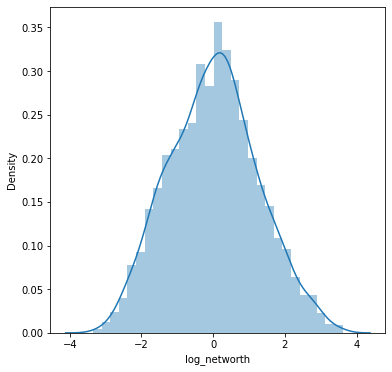

In [94]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.0026899709897268
MSE: 1.5502701634520462
RMSE: 1.245098455324737


In [96]:
file = open('KNeighborsRegressorLog.pkl', 'wb')
pickle.dump(knnR_random, file)

### With Log 

In [97]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [98]:
knnR = KNeighborsRegressor()
knnR.fit(x_train, y_train)

KNeighborsRegressor()

In [99]:
y_pred = knnR.predict(x_test)

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 34536706.6427289
MSE: 3175681148280071.5
RMSE: 56353182.23738631


In [101]:
parameters = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [i for i in range(3, 30)],
    'n_neighbors': [i for i in range(3, 20)]
}

In [102]:
knnR_random = RandomizedSearchCV(
    estimator = knnR, 
    param_distributions = parameters,
    scoring='neg_mean_squared_error', 
    n_iter = 10, 
    cv = 5, 
    verbose=3, 
    random_state=42, 
    n_jobs = 1)

In [103]:
knnR_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-3214040406398160.500 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-3116192237058037.000 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-2921400040534203.000 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-3046568907205144.000 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=7;, score=-3316535462804358.000 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=17;, score=-3073413995734689.000 total time=   0.4s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=17;, score=-2982305078582899.000 total time=   0.4s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=17;, score=-2826898110284954.500 total time=   0.4s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=17;, score=-287223

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29],
                                        'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 13, 14, 15, 16,
                                                        17, 18, 19]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [104]:
knnR_random.best_params_

{'n_neighbors': 17, 'leaf_size': 7, 'algorithm': 'brute'}

In [105]:
prediction = knnR_random.predict(x_test)

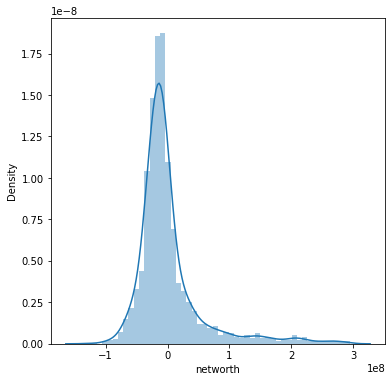

In [106]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 33303843.278065264
MSE: 2936920408049051.5
RMSE: 54193361.29129703


In [108]:
file = open('KNeighborsRegressor.pkl', 'wb')
pickle.dump(knnR_random, file)